In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv
/kaggle/input/social-networking-ads-knn/__results__.html
/kaggle/input/social-networking-ads-knn/__resultx__.html
/kaggle/input/social-networking-ads-knn/__notebook__.ipynb
/kaggle/input/social-networking-ads-knn/__output__.json
/kaggle/input/social-networking-ads-knn/custom.css
/kaggle/input/social-networking-ads-knn/__results___files/__results___24_0.png
/kaggle/input/social-networking-ads-knn/__results___files/__results___26_0.png


In [3]:
df=pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

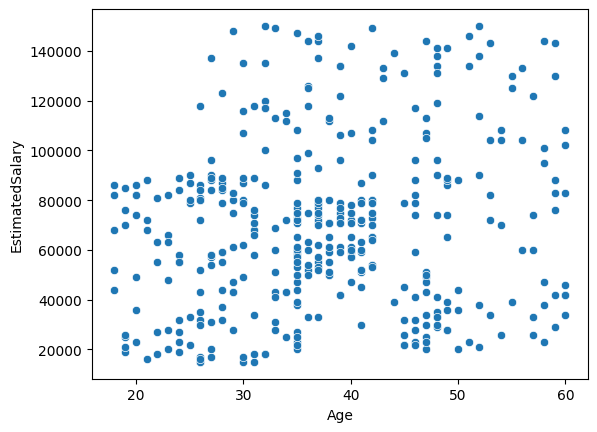

In [8]:
sns.scatterplot(df,x=df.iloc[:,0],y=df.iloc[:,1])

In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3932 - loss: 1597.1415 - val_accuracy: 0.6000 - val_loss: 609.4087
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5698 - loss: 362.6618 - val_accuracy: 0.6000 - val_loss: 148.3696
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6559 - loss: 216.4580 - val_accuracy: 0.4000 - val_loss: 299.3759
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4189 - loss: 257.0038 - val_accuracy: 0.6000 - val_loss: 107.8175
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4105 - loss: 132.1539 - val_accuracy: 0.6000 - val_loss: 203.3637
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5190 - loss: 141.5369 - val_accuracy: 0.6000 - val_loss: 205.5909
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5265 - loss: 125.1732 - val_accuracy: 0.4000 - val_loss: 7.2555
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5095 - loss: 20.20

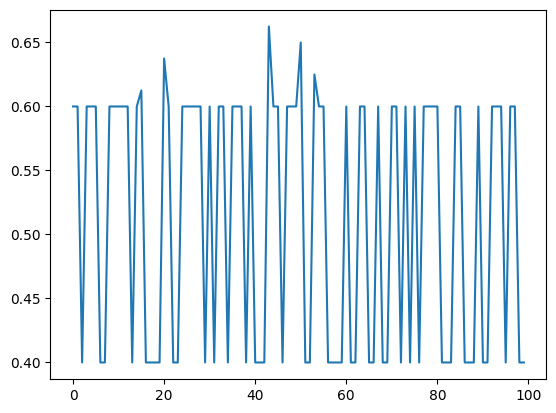

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

# Applying scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled[:10]

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003]])

<Axes: >

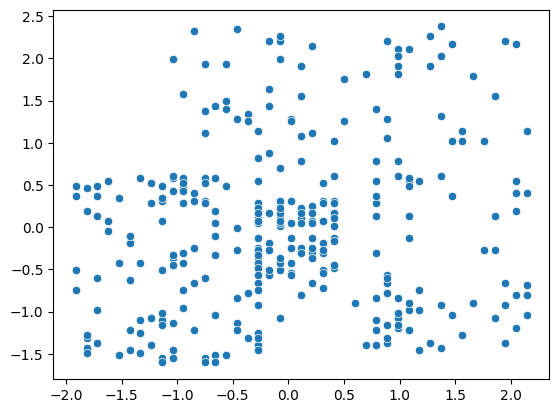

In [33]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [34]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6962 - loss: 0.6722 - val_accuracy: 0.7500 - val_loss: 0.6310
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8022 - loss: 0.6128 - val_accuracy: 0.8000 - val_loss: 0.5747
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8116 - loss: 0.5647 - val_accuracy: 0.8000 - val_loss: 0.5284
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8210 - loss: 0.5322 - val_accuracy: 0.8125 - val_loss: 0.4883
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8326 - loss: 0.4994 - val_accuracy: 0.8000 - val_loss: 0.4533
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7892 - loss: 0.4713 - val_accuracy: 0.8000 - val_loss: 0.4244
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8196 - loss: 0.4511 - val_accuracy: 0.8250 - val_loss: 0.4008
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8550 - loss: 0.4050 - val_accuracy: 0.8250 - val_loss: 0.

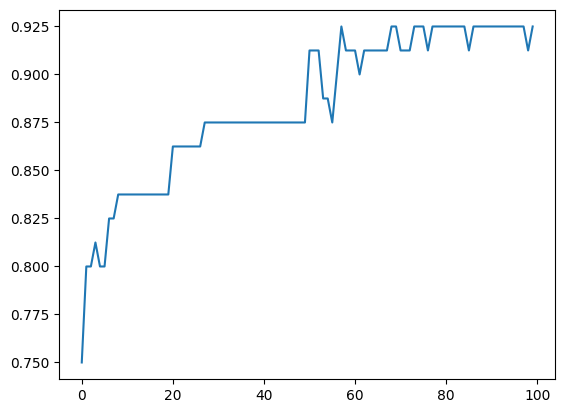

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])